<a href="https://colab.research.google.com/github/lukmanaj/coursera-statistical-analysis-with-r-for-public-health/blob/main/notebooks/logistic_regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# loading packages
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#diabetes <- read_csv("final-diabetes-data-for-R.csv")
diabetes <- read_csv("https://raw.githubusercontent.com/lukmanaj/coursera-statistical-analysis-with-r-for-public-health/main/data/final-diabetes-data-for-R.csv")
dim(diabetes)


New names:
• `` -> `...1`
Rows: 403 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): location, gender, frame, dm
dbl (20): ...1, id, chol, stab.glu, hdl, ratio, glyhb, age, height, weight, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 403  24

In [3]:
colnames(diabetes)


[1] "...1"      "id"        "chol"      "stab.glu"  "hdl"       "ratio"    
 [7] "glyhb"     "location"  "age"       "gender"    "height"    "weight"   
[13] "frame"     "bp.1s"     "bp.1d"     "bp.2s"     "bp.2d"     "waist"    
[19] "hip"       "time.ppn"  "insurance" "fh"        "smoking"   "dm"

In [4]:
dimnames(diabetes[2])


[[1]]
  [1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147" "148" "149" "150" "151" "152" "153" "154" "155" "156"
[157] "157" "158" "159" "160" "161" "162" "163" "164" "165" "166" "167" "168"
[169] "169" "170" "171" "172" "173" "174" "175" "176" "177" "178" "179" "180"
[181] "181" "182" "183" "184" "185" "186" "187" "188" "189" "190" "191" "192"
[193] "193" "194" "195" "196" "197" "198" "199" "200" "201" "202" "203" "204"
[205] "205" "206" "207" "208" "209" "210" "211" "212" "213" "214" "215" "216"
[217] "217" "218" "219" "220" "221" "222" "223" "224" "225" "226" "227" "228"
[229] "229" "230" "231" "232" "233" "234" "235" "236" "237" "238" "239" "240"
[241] "241" "242" "243" "244" "245" "246" "247" "248" "249" "250" "251" "252"
[253] "253" "254" "255" "256" "257" "258" "259" "260" "261" "262" "263" "264"
[265] "265" "266" "267" "268" "269" "270" "271" "272" "273" "274" "275" "276"
[277] "277" "278" "279" "280" "281" "282" "283" "284" "285" "286" "287" "288"
[289] "289" "290" "291" "292" "293" "294" "295" "296" "297" "298" "299" "300"
[301] "301" "302" "303" "304" "305" "306" "307" "308" "309" "310" "311" "312"
[313] "313" "314" "315" "316" "317" "318" "319" "320" "321" "322" "323" "324"
[325] "325" "326" "327" "328" "329" "330" "331" "332" "333" "334" "335" "336"
[337] "337" "338" "339" "340" "341" "342" "343" "344" "345" "346" "347" "348"
[349] "349" "350" "351" "352" "353" "354" "355" "356" "357" "358" "359" "360"
[361] "361" "362" "363" "364" "365" "366" "367" "368" "369" "370" "371" "372"
[373] "373" "374" "375" "376" "377" "378" "379" "380" "381" "382" "383" "384"
[385] "385" "386" "387" "388" "389" "390" "391" "392" "393" "394" "395" "396"
[397] "397" "398" "399" "400" "401" "402" "403"

[[2]]
[1] "id"

In [5]:
str(diabetes)


spc_tbl_ [403 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1     : num [1:403] 1 2 3 4 5 6 7 8 9 10 ...
 $ id       : num [1:403] 1000 1001 1002 1003 1005 ...
 $ chol     : num [1:403] 203 165 228 78 249 248 195 227 177 263 ...
 $ stab.glu : num [1:403] 82 97 92 93 90 94 92 75 87 89 ...
 $ hdl      : num [1:403] 56 24 37 12 28 69 41 44 49 40 ...
 $ ratio    : num [1:403] 3.6 6.9 6.2 6.5 8.9 ...
 $ glyhb    : num [1:403] 4.31 4.44 4.64 4.63 7.72 ...
 $ location : chr [1:403] "Buckingham" "Buckingham" "Buckingham" "Buckingham" ...
 $ age      : num [1:403] 46 29 58 67 64 34 30 37 45 55 ...
 $ gender   : chr [1:403] "female" "female" "female" "male" ...
 $ height   : num [1:403] 62 64 61 67 68 71 69 59 69 63 ...
 $ weight   : num [1:403] 121 218 256 119 183 190 191 170 166 202 ...
 $ frame    : chr [1:403] "medium" "large" "large" "large" ...
 $ bp.1s    : num [1:403] 118 112 190 110 138 132 161 NA 160 108 ...
 $ bp.1d    : num [1:403] 59 68 92 50 80 86 112 NA 80 72 ...
 $ bp.2s   

In [6]:
diabetes$dm <- factor(diabetes$dm)
diabetes$gender <- factor(diabetes$gender)
class(diabetes$dm)


[1] "factor"

In [7]:
table(diabetes$dm)



 no yes 
330  60 

In [8]:
#Simple Logistic Regression
m<- glm(dm~1,family=binomial (link=logit),data = diabetes)
summary(m)



Call:
glm(formula = dm ~ 1, family = binomial(link = logit), data = diabetes)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.7047     0.1403  -12.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.87  on 389  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 336.87

Number of Fisher Scoring iterations: 3


In [9]:
table(m$y) # checking how R has interpreted the binary outcome



  0   1 
330  60 

In [10]:
m1<- glm(dm~age,family=binomial (link=logit),data = diabetes)
summary(m1)





Call:
glm(formula = dm ~ age, family = binomial(link = logit), data = diabetes)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.404530   0.542828  -8.114 4.90e-16 ***
age          0.052465   0.009388   5.589 2.29e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 299.41  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 303.41

Number of Fisher Scoring iterations: 5


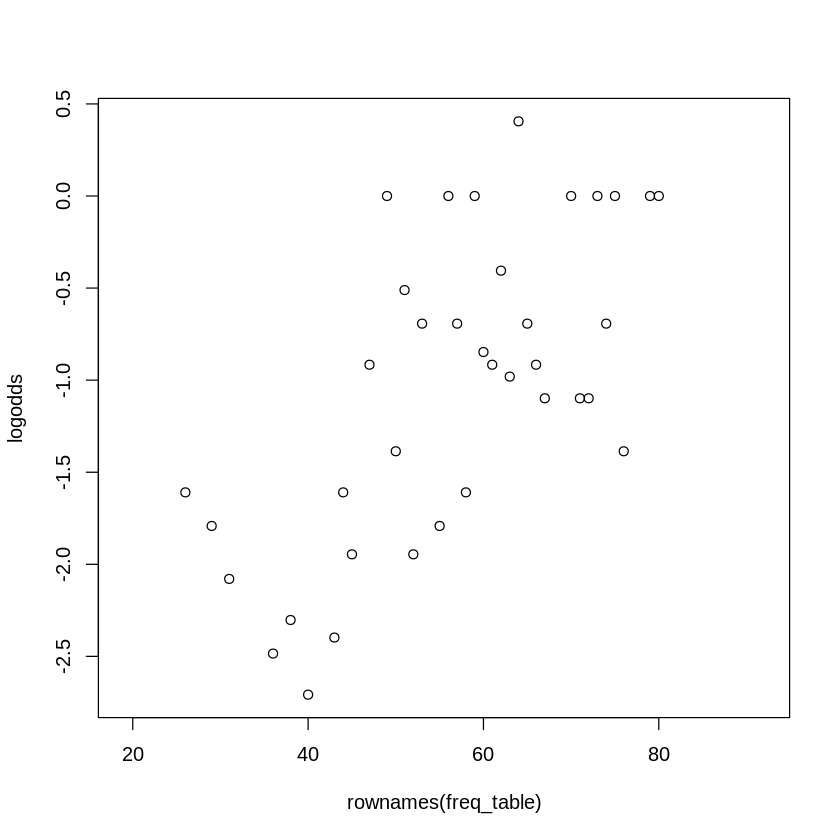

In [11]:
# create a cross tabulation of age and diabetes status
dm_by_age <- table(diabetes$age, diabetes$dm)
# output the frequencies of diabetes status by age
freq_table <- prop.table(dm_by_age, margin = 1)
# calculate the odds of having diabetes
odds <- freq_table[, "yes"]/freq_table[, "no"]
# calculate the log odds
logodds <- log(odds)
# plot the ages found in the sample against the log odds of having diabetes
plot(rownames(freq_table), logodds)





In [12]:
#comparing age and gender as predictors

m1<- glm(dm~age,family=binomial (link=logit),data = diabetes)
summary(m1)
m2<- glm(dm~gender,family=binomial (link=logit),data = diabetes)
summary(m2)
m3 <- glm(dm~location,family=binomial (link=logit),data = diabetes)
summary(m3)



Call:
glm(formula = dm ~ age, family = binomial(link = logit), data = diabetes)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.404530   0.542828  -8.114 4.90e-16 ***
age          0.052465   0.009388   5.589 2.29e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 299.41  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 303.41

Number of Fisher Scoring iterations: 5



Call:
glm(formula = dm ~ gender, family = binomial(link = logit), data = diabetes)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.74150    0.18592  -9.367   <2e-16 ***
gendermale   0.08694    0.28352   0.307    0.759    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.78  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 338.78

Number of Fisher Scoring iterations: 4



Call:
glm(formula = dm ~ location, family = binomial(link = logit), 
    data = diabetes)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.6349     0.1963  -8.327   <2e-16 ***
locationLouisa  -0.1395     0.2809  -0.497     0.62    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.63  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 338.63

Number of Fisher Scoring iterations: 4


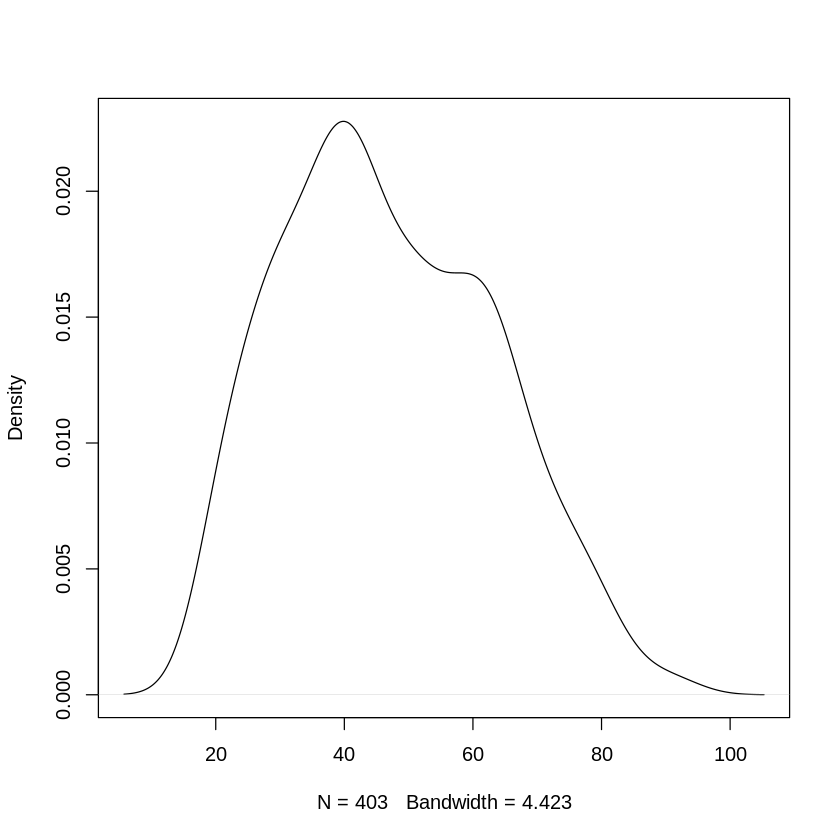

In [13]:
#Kernel density plots // for the distribition- in place of histogram

d <- density(diabetes$age)
plot(d,main = "") # gives warnings but the “main” argument suppresses the ugly default title



In [14]:
class(diabetes$chol)



[1] "numeric"

In [15]:
summary(diabetes$chol)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   78.0   179.0   204.0   207.8   230.0   443.0       1 

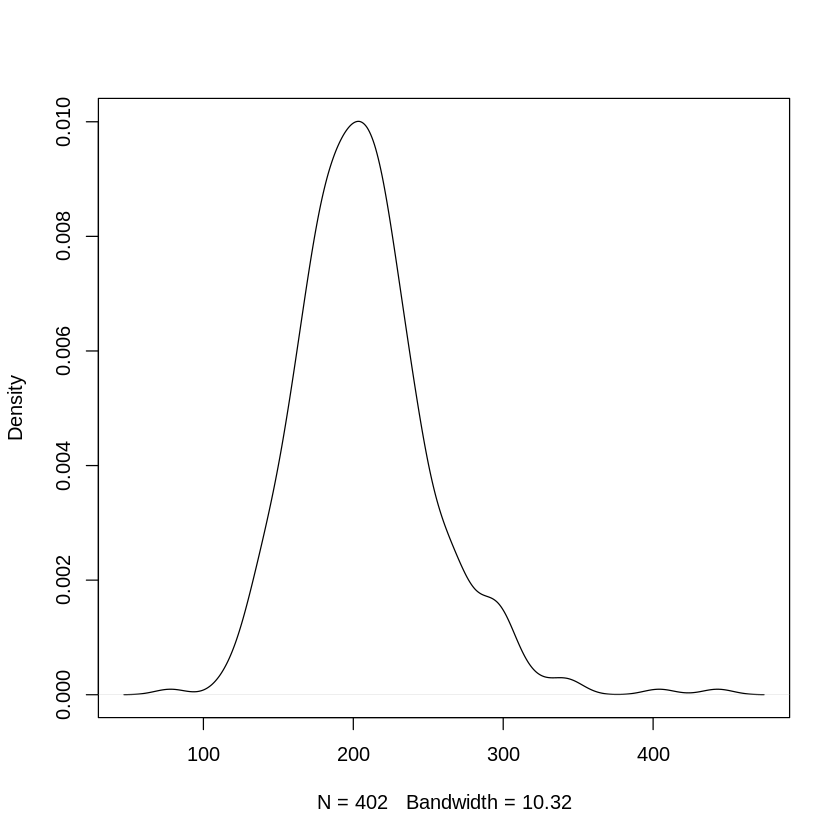

In [16]:
#remove NAs
chol.no.na <- diabetes$chol[is.na(diabetes$chol)==0]
d <- density(chol.no.na)
plot(d,main = "")



In [17]:
lr2 <- glm(dm~age+gender+height,data = diabetes, family = binomial(link = logit))
summary(lr2)




Call:
glm(formula = dm ~ age + gender + height, family = binomial(link = logit), 
    data = diabetes)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.88356    3.81082  -2.856  0.00429 ** 
age           0.05750    0.01018   5.650 1.61e-08 ***
gendermale   -0.53312    0.42723  -1.248  0.21209    
height        0.09729    0.05609   1.735  0.08282 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 329.79  on 384  degrees of freedom
Residual deviance: 291.80  on 381  degrees of freedom
  (18 observations deleted due to missingness)
AIC: 299.8

Number of Fisher Scoring iterations: 5


In [18]:
lgr <- glm(dm~age+chol+insurance,data = diabetes, family = binomial(link = logit))
summary(lgr)



Call:
glm(formula = dm ~ age + chol + insurance, family = binomial(link = logit), 
    data = diabetes)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.782785   0.859767  -6.726 1.74e-11 ***
age          0.049720   0.009757   5.096 3.47e-07 ***
chol         0.008392   0.003150   2.665  0.00771 ** 
insurance   -0.294207   0.188047  -1.565  0.11769    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.54  on 388  degrees of freedom
Residual deviance: 289.29  on 385  degrees of freedom
  (14 observations deleted due to missingness)
AIC: 297.29

Number of Fisher Scoring iterations: 5


In [19]:
confint(lgr)


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-7.541869422,-4.15676095
age,0.031078284,0.06947371
chol,0.002232578,0.01468174
insurance,-0.667460744,0.07225062


In [20]:
# analysis of deviance
anova(lgr,test = "Chisq")


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,388,334.5374,NA
age,1,35.412938,387,299.1244,2.667093e-09
chol,1,7.363043,386,291.7614,6.657801e-03
insurance,1,2.473144,385,289.2883,1.158061e-01


In [21]:
diabetes$insurance <- factor(diabetes$insurance)

## Using Tidyverse Well

Here, I restructure the code to use a tidyverse piping routine.

In [22]:
# Reading data and basic manipulations
diabetes <- diabetes |>
  as_tibble() |>
  mutate(
    dm = factor(dm),
    gender = factor(gender),
    insurance = factor(insurance)
  )


In [24]:
# Print dataset dimensions, column names, and structure
diabetes |> dim()


[1] 403  24

In [25]:
diabetes |> colnames()


[1] "...1"      "id"        "chol"      "stab.glu"  "hdl"       "ratio"    
 [7] "glyhb"     "location"  "age"       "gender"    "height"    "weight"   
[13] "frame"     "bp.1s"     "bp.1d"     "bp.2s"     "bp.2d"     "waist"    
[19] "hip"       "time.ppn"  "insurance" "fh"        "smoking"   "dm"

In [26]:
diabetes |> str()


tibble [403 × 24] (S3: tbl_df/tbl/data.frame)
 $ ...1     : num [1:403] 1 2 3 4 5 6 7 8 9 10 ...
 $ id       : num [1:403] 1000 1001 1002 1003 1005 ...
 $ chol     : num [1:403] 203 165 228 78 249 248 195 227 177 263 ...
 $ stab.glu : num [1:403] 82 97 92 93 90 94 92 75 87 89 ...
 $ hdl      : num [1:403] 56 24 37 12 28 69 41 44 49 40 ...
 $ ratio    : num [1:403] 3.6 6.9 6.2 6.5 8.9 ...
 $ glyhb    : num [1:403] 4.31 4.44 4.64 4.63 7.72 ...
 $ location : chr [1:403] "Buckingham" "Buckingham" "Buckingham" "Buckingham" ...
 $ age      : num [1:403] 46 29 58 67 64 34 30 37 45 55 ...
 $ gender   : Factor w/ 2 levels "female","male": 1 1 1 2 2 2 2 2 2 1 ...
 $ height   : num [1:403] 62 64 61 67 68 71 69 59 69 63 ...
 $ weight   : num [1:403] 121 218 256 119 183 190 191 170 166 202 ...
 $ frame    : chr [1:403] "medium" "large" "large" "large" ...
 $ bp.1s    : num [1:403] 118 112 190 110 138 132 161 NA 160 108 ...
 $ bp.1d    : num [1:403] 59 68 92 50 80 86 112 NA 80 72 ...
 $ bp.2s    : n

In [34]:
# Simple Logistic Regression
m <- diabetes |>
  glm(formula = dm ~ 1, family = binomial(link = "logit"))
m |> summary()



Call:
glm(formula = dm ~ 1, family = binomial(link = "logit"), data = diabetes)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.7047     0.1403  -12.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.87  on 389  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 336.87

Number of Fisher Scoring iterations: 3


In [32]:
m1 <- diabetes |>
  glm(formula = dm ~ age, family = binomial(link = "logit"))
m1 |> summary()



Call:
glm(formula = dm ~ age, family = binomial(link = "logit"), data = diabetes)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.404530   0.542828  -8.114 4.90e-16 ***
age          0.052465   0.009388   5.589 2.29e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 299.41  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 303.41

Number of Fisher Scoring iterations: 5


In [36]:
# Cross tabulation of age and diabetes status
dm_by_age <- diabetes |>
  count(age, dm) |>   # Create a frequency table
  pivot_wider(names_from = dm, values_from = n, values_fill = list(n = 0)) |>  # Spread the data for 'yes' and 'no' diabetes status
  mutate(odds = `yes` / `no`,  # Calculate odds
         logodds = log(odds))  # Calculate log odds


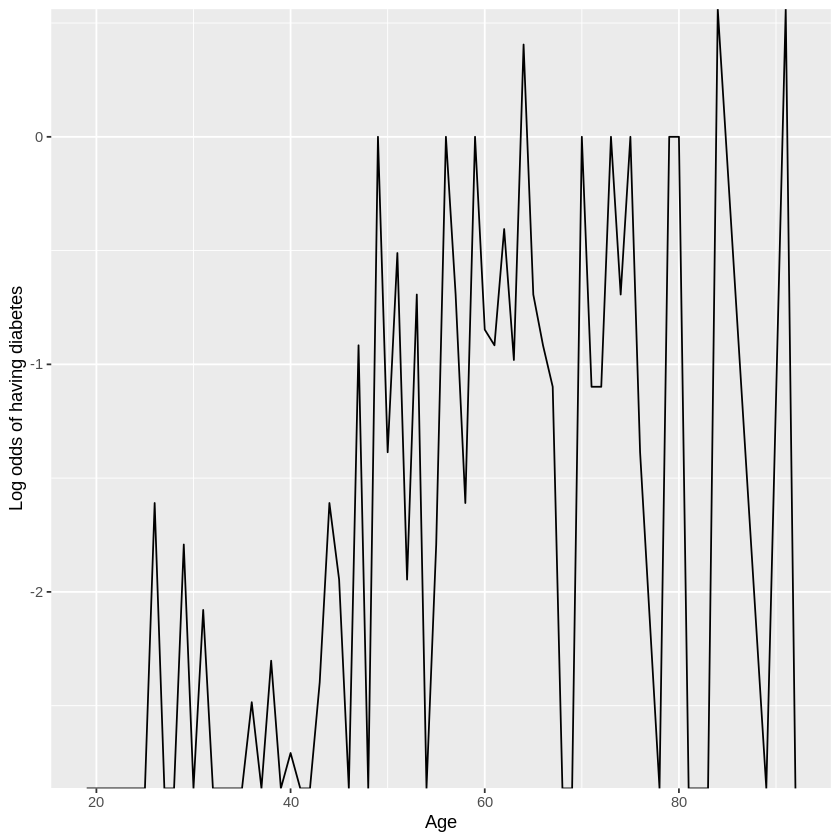

In [40]:
# Plot the log odds of having diabetes by age
ggplot(dm_by_age, aes(x = age, y = logodds)) +
  geom_line() +
  labs(x = "Age", y = "Log odds of having diabetes")


In [41]:
# Comparing age and gender as predictors
m2 <- diabetes |>
  glm(formula = dm ~ gender, family = binomial(link = "logit"))
m2 |> summary()



Call:
glm(formula = dm ~ gender, family = binomial(link = "logit"), 
    data = diabetes)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.74150    0.18592  -9.367   <2e-16 ***
gendermale   0.08694    0.28352   0.307    0.759    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.78  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 338.78

Number of Fisher Scoring iterations: 4


In [42]:
m3 <- diabetes |>
  glm(formula = dm ~ location, family = binomial(link = "logit"))
m3 |> summary()



Call:
glm(formula = dm ~ location, family = binomial(link = "logit"), 
    data = diabetes)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.6349     0.1963  -8.327   <2e-16 ***
locationLouisa  -0.1395     0.2809  -0.497     0.62    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.87  on 389  degrees of freedom
Residual deviance: 334.63  on 388  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 338.63

Number of Fisher Scoring iterations: 4


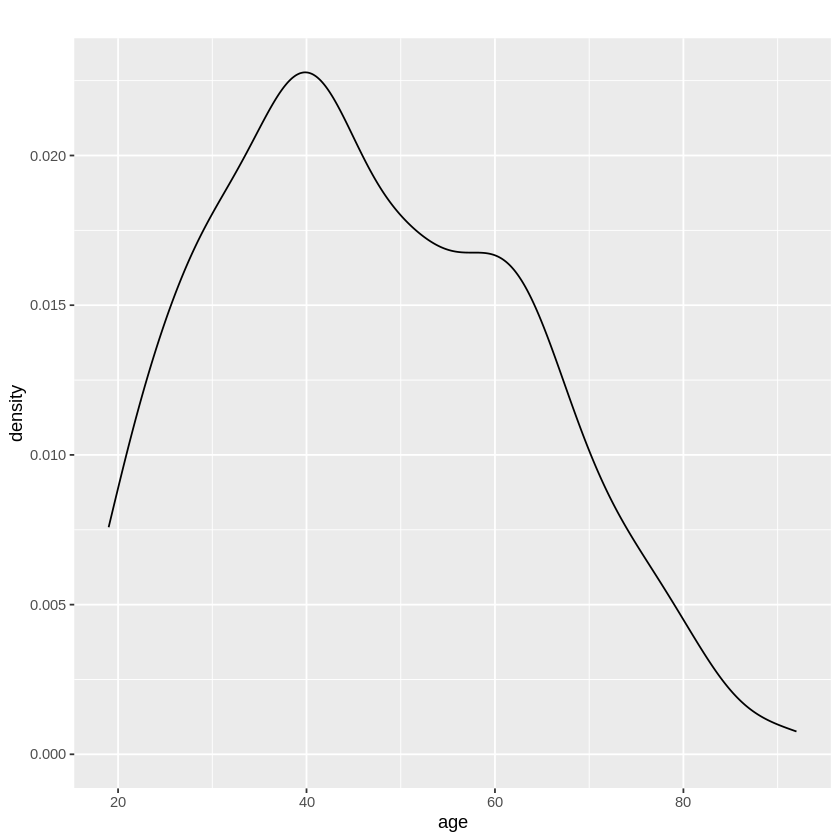

In [43]:
# Kernel density plots for the distribution
diabetes |>
  ggplot(aes(x = age)) +
  geom_density() +
  labs(title = "")


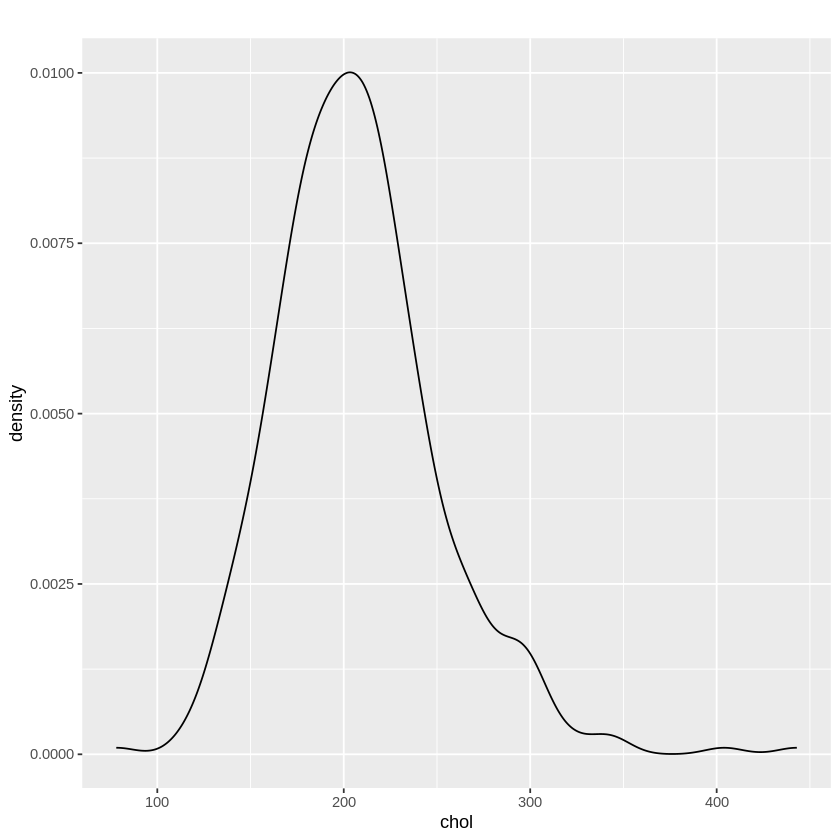

In [44]:
# Removing NAs and plotting density for 'chol'
diabetes |>
  drop_na(chol) |>
  ggplot(aes(x = chol)) +
  geom_density() +
  labs(title = "")


In [45]:
# Logistic regressions with multiple predictors
lr2 <- diabetes |>
  glm(formula = dm ~ age + gender + height, family = binomial(link = "logit"))
lr2 |> summary()



Call:
glm(formula = dm ~ age + gender + height, family = binomial(link = "logit"), 
    data = diabetes)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.88356    3.81082  -2.856  0.00429 ** 
age           0.05750    0.01018   5.650 1.61e-08 ***
gendermale   -0.53312    0.42723  -1.248  0.21209    
height        0.09729    0.05609   1.735  0.08282 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 329.79  on 384  degrees of freedom
Residual deviance: 291.80  on 381  degrees of freedom
  (18 observations deleted due to missingness)
AIC: 299.8

Number of Fisher Scoring iterations: 5


In [47]:
lgr <- diabetes |>
  glm(formula = dm ~ age + chol + insurance, family = binomial(link = "logit"))
lgr |> summary()


Call:
glm(formula = dm ~ age + chol + insurance, family = binomial(link = "logit"), 
    data = diabetes)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.794252   0.874555  -6.625 3.46e-11 ***
age          0.049753   0.009770   5.092 3.54e-07 ***
chol         0.008402   0.003153   2.665   0.0077 ** 
insurance1  -0.271955   0.359445  -0.757   0.4493    
insurance2  -0.589803   0.377434  -1.563   0.1181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.54  on 388  degrees of freedom
Residual deviance: 289.28  on 384  degrees of freedom
  (14 observations deleted due to missingness)
AIC: 299.28

Number of Fisher Scoring iterations: 5


In [48]:
lgr |> confint()


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-7.585225810,-4.14047457
age,0.031090409,0.06953818
chol,0.002236513,0.01470098
insurance1,-0.980997627,0.43496216
insurance2,-1.342712045,0.14480165


In [49]:
lgr |> anova(test = "Chisq")


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,388,334.5374,NA
age,1,35.412938,387,299.1244,2.667093e-09
chol,1,7.363043,386,291.7614,6.657801e-03
insurance,2,2.478420,384,289.2830,2.896129e-01
